# PRCP-1024-Texas Salary Prediction

## TEAM ID:"PTID-CDS-AUG-24-2047

## BATCH ID: 08-APR-24-CDS-BUN-021-WDM09-BAN

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help theTexas state government team to know the payroll information of employees of the state of Texas.

Task 3:-

● Who are the outliers in the salaries?

● What departments/roles have the biggest wage disparities between
managers and employees?

● Have salaries and total compensations for some roles/ departments/
head-count changed over time?

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading datafile
df = pd.read_csv(r"C:\Users\Varun Kumar\Desktop\capstone_projects\prcp 1024 Texas Salary Prediction\salary.csv")

In [3]:
df.shape

(149481, 21)

### **TASK 1**
### Prepare a complete data analysis report on the given data.

In [4]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
df.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


## **DOMAIN ANALYSIS**

Salary data for positions at each of the 113 Texas state government departments is available in this database.In accordance with the Texas Public Information Act, the Tribune requested salary information from the state comptroller in order to receive this data.Our primary goal is to use the twenty-one features provided to forecast staff salaries across various Texas state government departments.

### 1)AGENCY:
This most likely relates to the agency name or ID that the worker is employed with. It indicates which organizational division the worker is a part of.

### 2) AGENCY NAME:
The complete name or official title of the agency is provided here, making it a more detailed version of the "AGENCY" column.

### 3)LAST NAME, FIRST NAME, MI:
The name of the employee is usually represented by these columns combined.
LAST NAME: Employee's last name.
FIRST NAME: Employee's first name.
MI: Middle initial of the employee (if applicable).

### 4)CLASS CODE:
This column most likely indicates the employee's position's classification code or category. It aids in the classification of various job kinds inside the organization.

### 5) CLASS TITLE:
The job title or formal title of the employee's position within the agency is typically listed in this column.

### 6) ETHNICITY: 
This column usually contains the employee's racial or ethnic background, frequently for compliance and diversity reporting needs.

### 7) GENDER: 
The employee's gender is shown in this column.

### 8) STATUS:
This could be a reference to the worker's full-time, part-time, or temporary employment status.

### 9) EMPLOY DATE:
The start date of the employee's current job or the date on which the employee's records with the agency were first created.

### 10) HRLY RATE:
The employee's hourly wage rate.

### 11) HRS PER WK: 
The number of hours a worker is expected to work each week.

### 12) MONTHLY:
The employee's monthly pay or earnings.

### 13) ANNUAL:
The employee's annual income or wage.

### 14) STATE NUMBER:
A special number or identity linked to the worker's file in the state or agency database.

### 15) duplicated:
This may show whether the employee has any duplicate records in the dataset.

### 16) multiple_full_time_jobs:
This could reveal whether the worker is employed by the agency in multiple full-time capacities.

### 17) combined_multiple_jobs:
May show whether the worker's various functions have been consolidated for reporting needs.

### 18) summed_annual_salary:
This could be the total or computed yearly salary taking into account all employment positions or income.

### 19) hide_from_search: 
This may help determine whether or not the employee's data should be kept private or concealed from specific reports or searches.

## Domain Analysis: 
### Quality and Integrity of Data:
Verify each field's accuracy and completeness. Ensure there are no missing values or anomalies, especially in sensitive fields like ethnicity and gender.

### Employee Demographics:
Examine gender and ethnicity distribution to comprehend diversity in the organization.

### Employment Status and wage:
To spot patterns or discrepancies, look at the distribution of full-time versus part-time workers, as well as wage ranges and hourly rates.

### Job responsibilities and Classification:
To comprehend the hierarchy and diversity of responsibilities within the agency, assess how job titles (CLASS TITLE) and classifications (CLASS CODE) are distributed.

### Data Cleanup and Deduplication:
Take care of any inconsistencies or duplicates that the 'duplicated' field has identified.

### Multiple Job Holders:
Employees who have been reported as having "multiple full-time jobs" or "combined multiple jobs" should have their workload distribution and income implications looked into.

### Salary Aggregation:
To examine overall salary expenditures across various groups or departments, use'summed_annual_salary'.

### Privacy and Access Control:
The consequences of 'hide_from_search' for data privacy and access control should be taken into consideration.

In [6]:
#Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [7]:
#Description of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGENCY,149481.0,545.736288,139.057691,101.0,529.00,530.00,696.00,9.300000e+02
HRLY RATE,149481.0,0.346488,4.211485,0.0,0.00,0.00,0.00,1.177885e+02
HRS PER WK,149481.0,39.714918,2.323855,1.0,40.00,40.00,40.00,7.000000e+01
MONTHLY,149481.0,4226.184248,2093.111691,50.0,3019.84,3720.17,4865.81,4.612500e+04
ANNUAL,149481.0,50714.210973,25117.340292,600.0,36238.08,44642.04,58389.72,5.535000e+05
STATE NUMBER,149481.0,565193.023521,478621.220542,1.0,113334.00,346373.00,1100500.00,1.271604e+06
multiple_full_time_jobs,14.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.000000e+00
summed_annual_salary,16.0,74303.955000,51925.944282,18000.0,32962.50,48063.30,123751.77,1.713834e+05


In [8]:
#Description of categorical columns
df.describe(include="object").T

,count,unique,top,freq
AGENCY NAME,149481,113,HEALTH AND HUMAN SERVICES COMMISSION ...,36667
LAST NAME,149481,38675,SMITH,1243
FIRST NAME,149481,23559,MICHAEL,1843
MI,149481,27,,38408
CLASS CODE,149481,1481,4504,9267
CLASS TITLE,149481,1422,CORREC OFFICER IV ...,9267
ETHNICITY,149481,6,WHITE,67142
GENDER,149481,2,FEMALE,85328
STATUS,149481,11,CRF - CLASSIFIED REGULAR FULL-TIME,142502
EMPLOY DATE,149481,6295,09/01/17,12359


## Insights:

1) The dataset contains **149481 datapoints with 21 features**, including the target variable, and includes wage information for positions at all 113 state government departments in Texas.

2) Dataset having both **numerical(8) as well as categorical values(13)** with some null values is there in "duplicated","multiple_full_time_jobs","combined_multiple_jobs", "summed_annual_salary", "hide_from_search" columns.

3) The maximum salary earned by employee per year is **553500**, where as minimum is 600.

4) An employee's weekly maximum work hours are **70** hours, while their minimum is **1** hour.

5) The special number that the state in where a company is located assigns to it; this number is used for recruiting staff and submitting taxes.

6) Dataset provided with **individual's monthly and annual salary**. We have chosen **annual salary as our objective variable** and monthly salary as one of our feature variables.

7) The standard deviation for "multiple full time jobs" column is 0, hence their is no variance in the data, we can drop that particular column in our data preprocessing step.

In [9]:
#All the columns in the dataframe
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [10]:
#Checking for no.of null values in each column
df.isnull().sum()/len(df)*100

AGENCY                      0.000000
AGENCY NAME                 0.000000
LAST NAME                   0.000000
FIRST NAME                  0.000000
MI                          0.000000
CLASS CODE                  0.000000
CLASS TITLE                 0.000000
ETHNICITY                   0.000000
GENDER                      0.000000
STATUS                      0.000000
EMPLOY DATE                 0.000000
HRLY RATE                   0.000000
HRS PER WK                  0.000000
MONTHLY                     0.000000
ANNUAL                      0.000000
STATE NUMBER                0.000000
duplicated                 99.904336
multiple_full_time_jobs    99.990634
combined_multiple_jobs     99.935109
summed_annual_salary       99.989296
hide_from_search           99.989296
dtype: float64

In [11]:
#Dropping columns
df = df.drop(['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'], axis = 1)

Droping the above columns because of 99% null values in the respective columns.

In [12]:
#Checking for null values again in the dataframe
df.isnull().sum()/len(df)

AGENCY          0.0
AGENCY NAME     0.0
LAST NAME       0.0
FIRST NAME      0.0
MI              0.0
CLASS CODE      0.0
CLASS TITLE     0.0
ETHNICITY       0.0
GENDER          0.0
STATUS          0.0
EMPLOY DATE     0.0
HRLY RATE       0.0
HRS PER WK      0.0
MONTHLY         0.0
ANNUAL          0.0
STATE NUMBER    0.0
dtype: float64

In [13]:
#Checking for duplicate values
df.duplicated().sum()

0

# EDA

In [28]:
#AGENCY 
df['AGENCY'].value_counts()

AGENCY
529    36667
696    35926
601    13099
530    12588
405    10097
       ...  
364        7
481        5
213        4
464        4
510        1
Name: count, Length: 113, dtype: int64

<Axes: xlabel='AGENCY'>

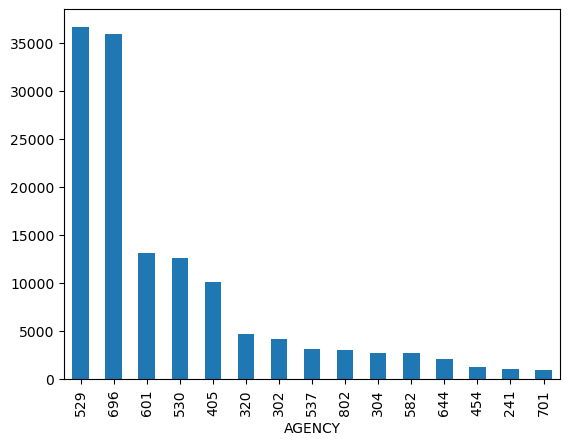

In [75]:
df['AGENCY'].value_counts()[:15].plot(kind = 'bar')

In [30]:
#AGENCY NAME
df['AGENCY NAME'].value_counts()

AGENCY NAME
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64

In [31]:
#CLASS TITLE
df['CLASS TITLE'].value_counts()

CLASS TITLE
CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: count, Length: 1422, dtype: int64

In [41]:
df['CLASS TITLE'].nunique()

1422

<Axes: xlabel='ETHNICITY', ylabel='count'>

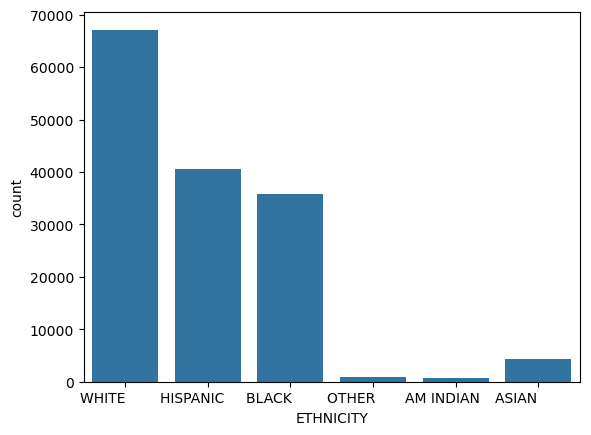

In [32]:
#ETHNICITY
sns.countplot(x="ETHNICITY",data=df)

<Axes: xlabel='GENDER', ylabel='count'>

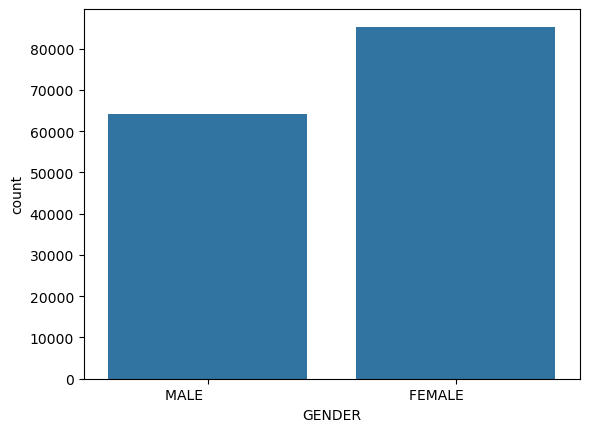

In [35]:
#GENDER
sns.countplot(x="GENDER",data=df)

In [36]:
df['ETHNICITY'].value_counts()

ETHNICITY
WHITE              67142
HISPANIC           40585
BLACK              35853
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: count, dtype: int64

In [37]:
df['GENDER'].value_counts()

GENDER
FEMALE             85328
MALE               64153
Name: count, dtype: int64

In [38]:
#STATUS
df['STATUS'].value_counts()

STATUS
CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: count, dtype: int64

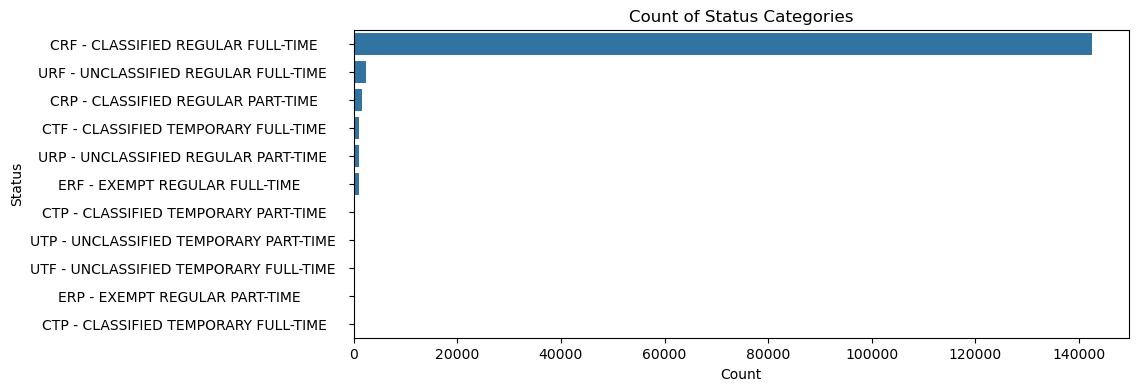

In [39]:
status_counts = df['STATUS'].value_counts()
status_visul = pd.DataFrame(status_counts)
status_visual = pd.DataFrame({'Status': status_counts.index, 'Count': status_counts.values})

# Plotting using Seaborn's barplot
plt.figure(figsize=(10, 4))
sns.barplot(x='Count', y='Status', data=status_visual)
plt.title('Count of Status Categories')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

In [40]:
status_visual

,Status,Count
0,CRF - CLASSIFIED REGULAR FULL-TIME,142502
1,URF - UNCLASSIFIED REGULAR FULL-TIME,2363
2,CRP - CLASSIFIED REGULAR PART-TIME,1531
3,CTF - CLASSIFIED TEMPORARY FULL-TIME,1096
4,URP - UNCLASSIFIED REGULAR PART-TIME,950
5,ERF - EXEMPT REGULAR FULL-TIME,923
6,CTP - CLASSIFIED TEMPORARY PART-TIME,81
7,UTP - UNCLASSIFIED TEMPORARY PART-TIME,21
8,UTF - UNCLASSIFIED TEMPORARY FULL-TIME,12
9,ERP - EXEMPT REGULAR PART-TIME,1


<Axes: xlabel='HRLY RATE', ylabel='Count'>

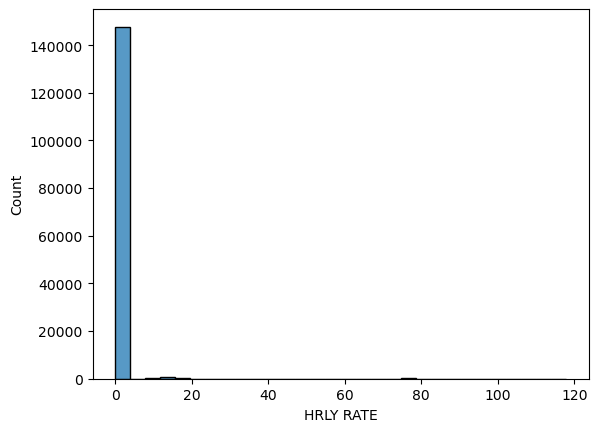

In [49]:
#HRLY RATE
sns.histplot(x='HRLY RATE', data=df, bins=30)

<Axes: xlabel='HRS PER WK', ylabel='Count'>

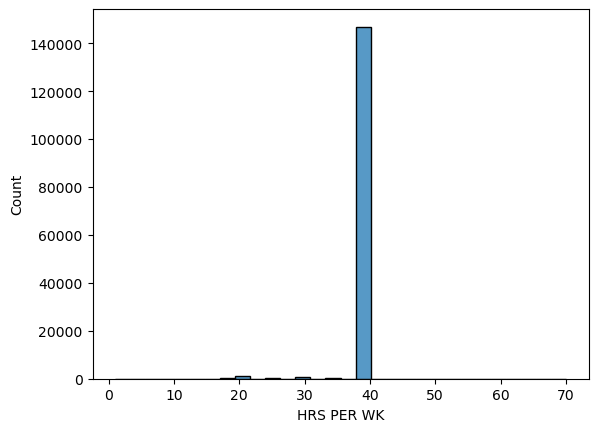

In [48]:
#HRS PER WK
sns.histplot(x='HRS PER WK', data=df, bins=30)

<Axes: xlabel='MONTHLY', ylabel='Count'>

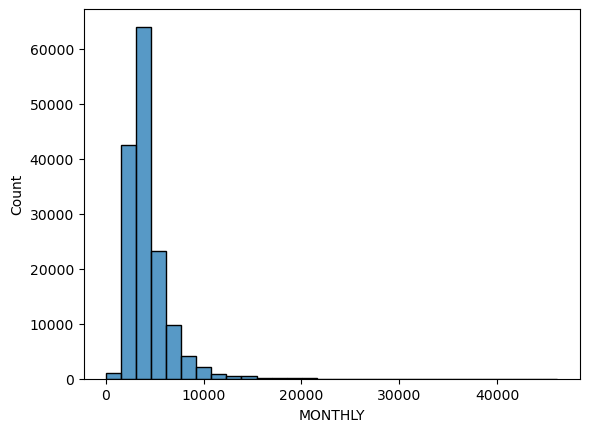

In [46]:
#MONTHLY
sns.histplot(x="MONTHLY", data=df, bins=30)

<Axes: xlabel='ANNUAL', ylabel='Count'>

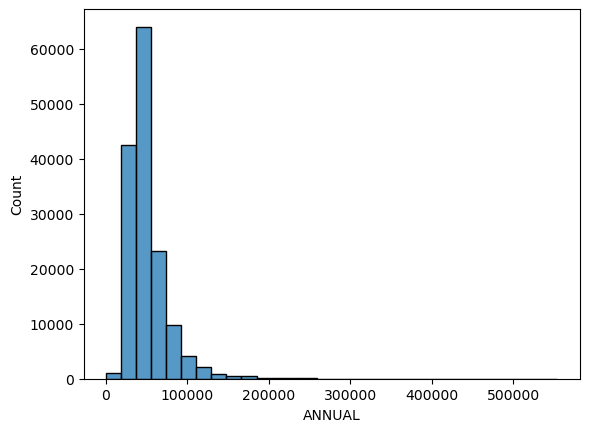

In [47]:
#ANNUAL
sns.histplot(x="ANNUAL", data=df, bins=30)

<Figure size 800x400 with 0 Axes>

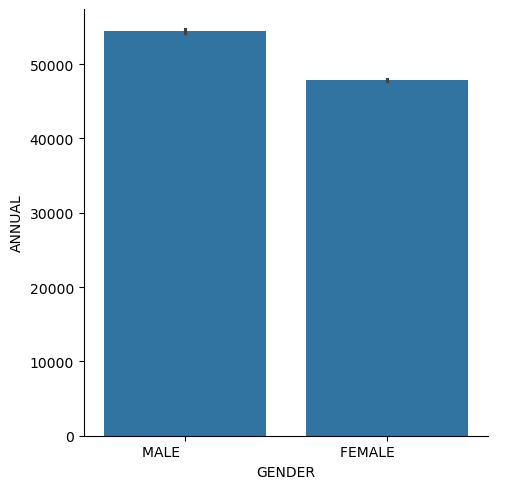

In [50]:
## Average Annual salary of male and female
plt.figure(figsize = (8,4))
sns.catplot(x = 'GENDER', y = 'ANNUAL', data = df, kind = 'bar')

<Figure size 800x400 with 0 Axes>

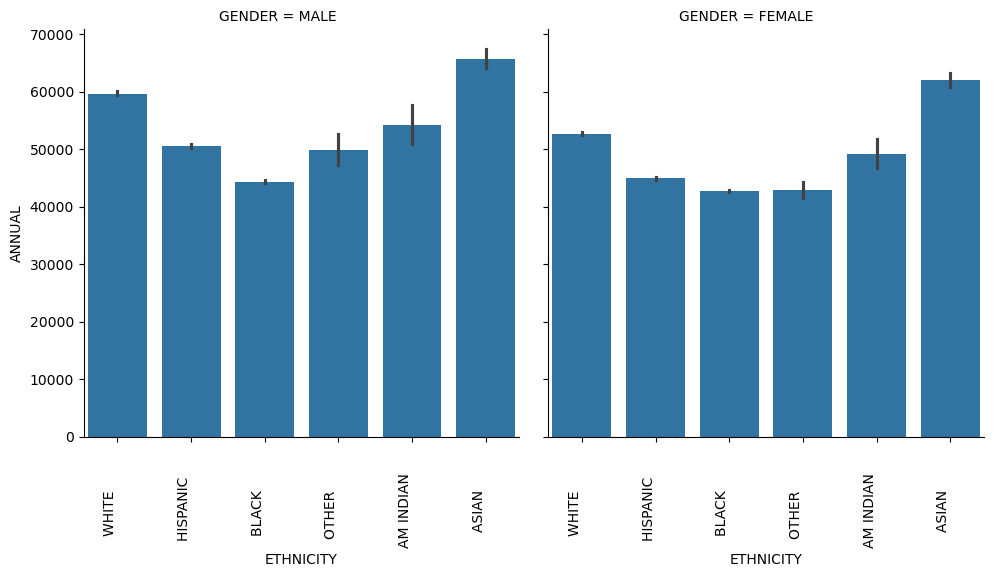

In [53]:
##Average Annual Salary by Ethnicity Wise and Gender
plt.figure(figsize = (8,4))
g = sns.catplot(x = 'ETHNICITY', y = 'ANNUAL', data = df, kind = 'bar', col="GENDER")
# Adjust x-axis ticks for each subplot individually
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.margins(x=0.01)

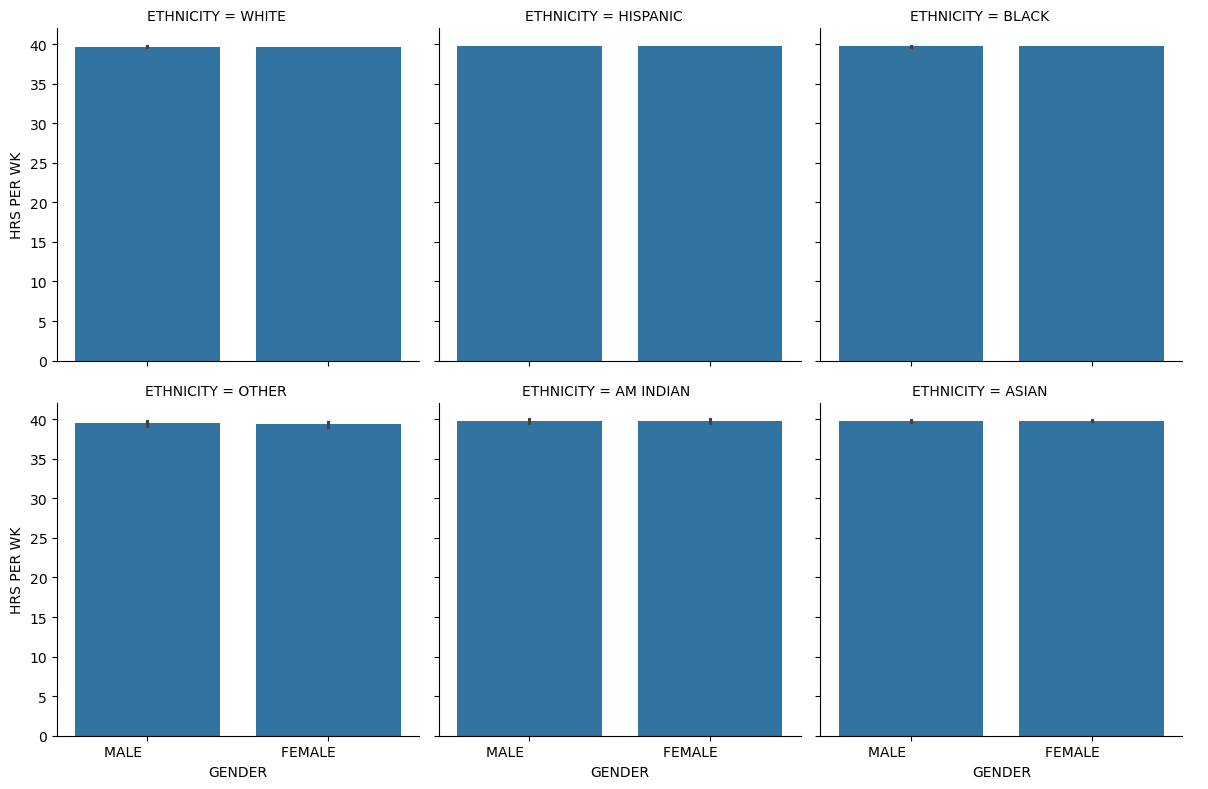

In [54]:
##Avg Hours per Week by Gender and Ethnicity Wise
sns.catplot(x = 'GENDER', y = 'HRS PER WK', data = df, col = 'ETHNICITY', kind = 'bar', col_wrap = 3, height = 4)

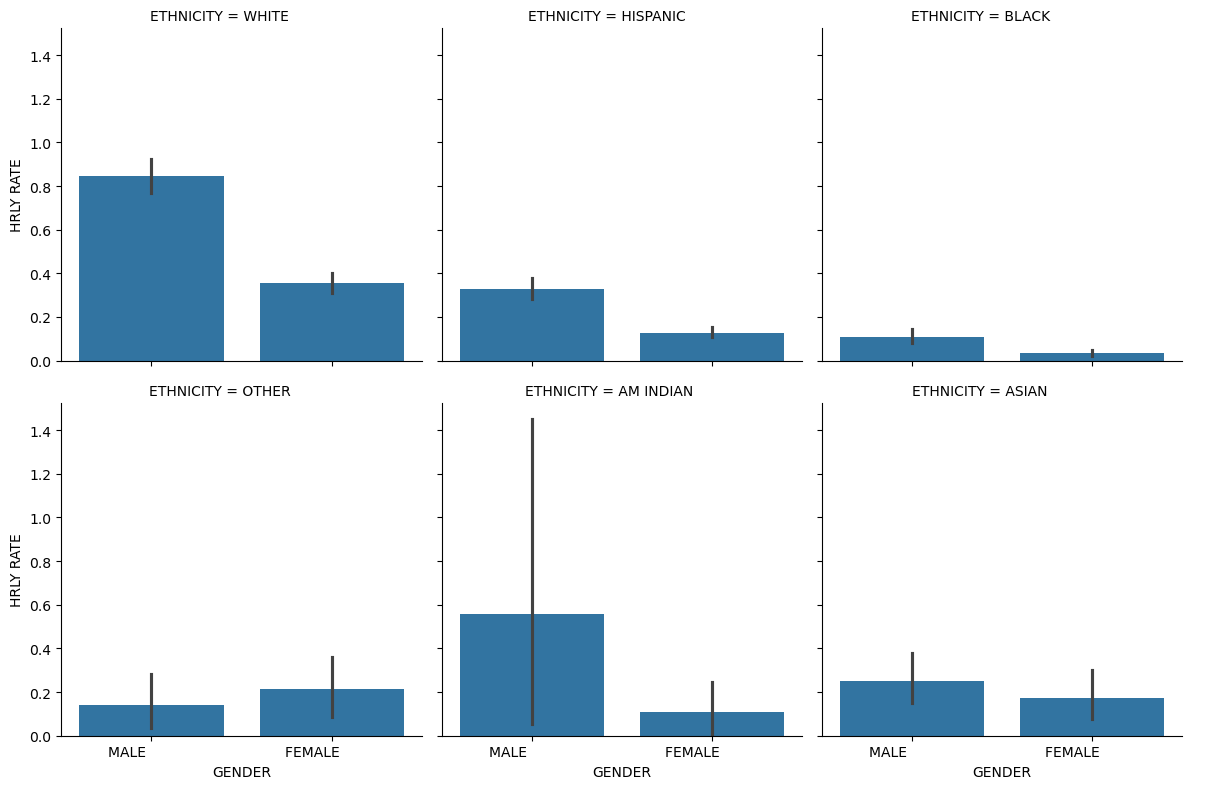

In [55]:
## Avg hourly rate by gender and ethnicity wise
sns.catplot(x = 'GENDER', y = 'HRLY RATE', data = df, col = 'ETHNICITY', kind = 'bar', col_wrap = 3, height = 4)

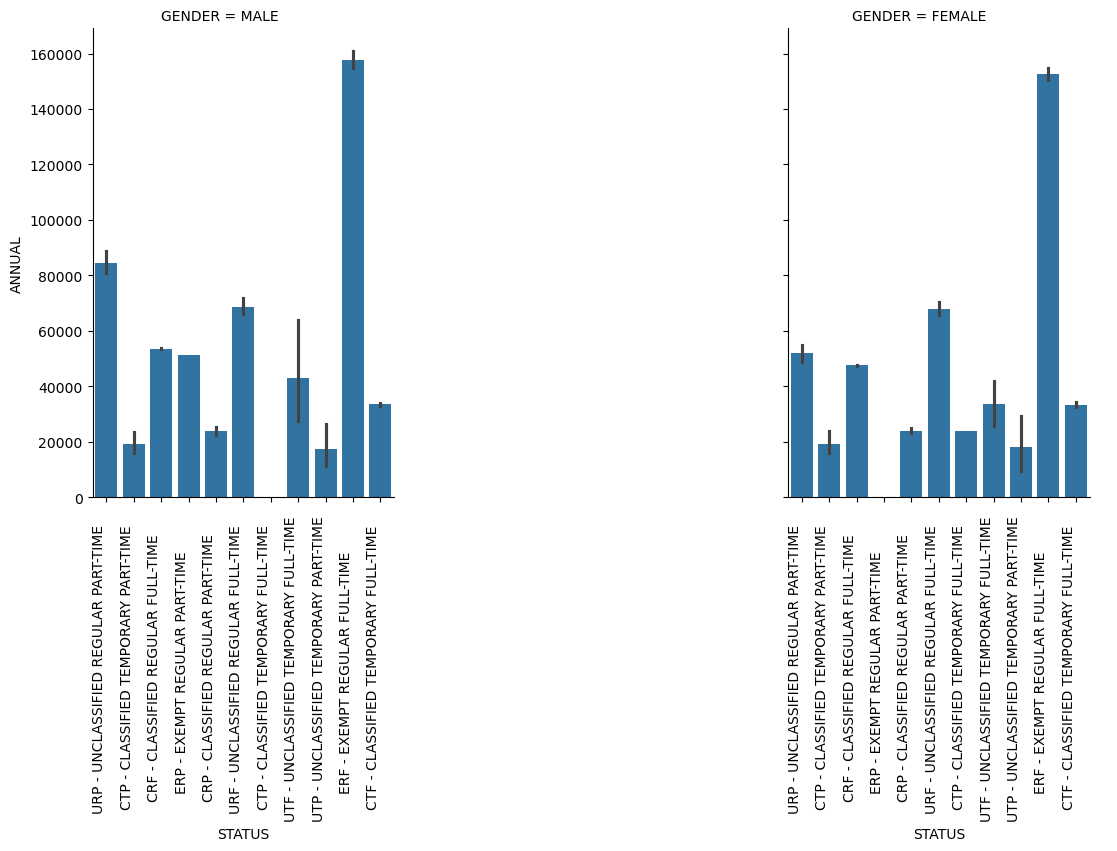

In [56]:
## Avg Annual salary by Status wise
g = sns.catplot(x = 'STATUS', y = 'ANNUAL', data = df, col ='GENDER', kind = 'bar')
plt.gcf().subplots_adjust(bottom=0.15)
# Adjust x-axis ticks for each subplot individually
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.margins(x=0.01)  # Adjust margins if needed to prevent cutoff
# Set figure size
g.fig.set_size_inches(12, 6)
# Display the plot
plt.show()

[Text(0.5, 1.0, 'Monthly Vs Annual')]

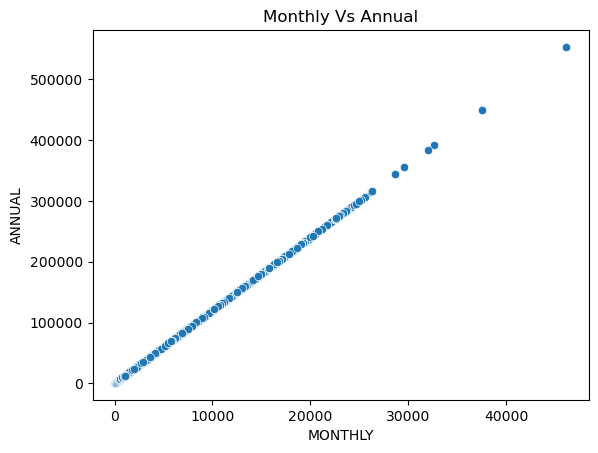

In [71]:
#Hourly Vs Annual
sns.scatterplot(x='MONTHLY', y='ANNUAL', data=df).set(title="Monthly Vs Annual")

[Text(0.5, 1.0, 'Monthly Vs Annual')]

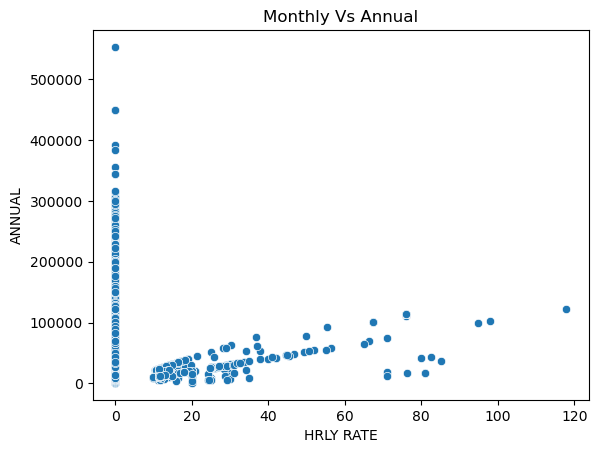

In [72]:
#Hourly Rate Vs Annual
sns.scatterplot(x='HRLY RATE', y='ANNUAL', data=df).set(title="Hourly Rate Vs Annual")

Text(0.5, 1.0, 'Annual vs Hours per week')

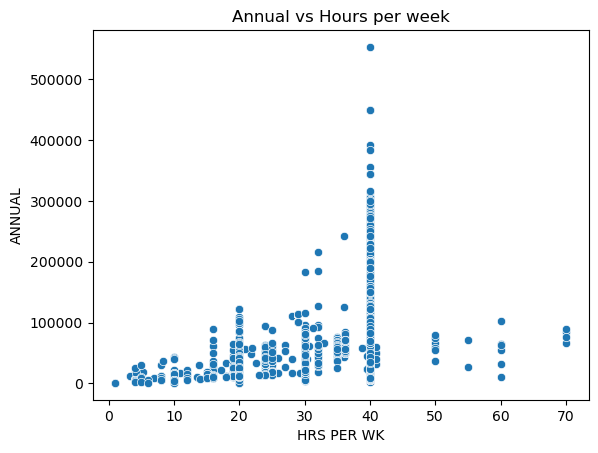

In [73]:
#Annual Vs Hours Per Week
sns.scatterplot(x = 'HRS PER WK', y = 'ANNUAL', data = df)
plt.title('Annual vs Hours per week')

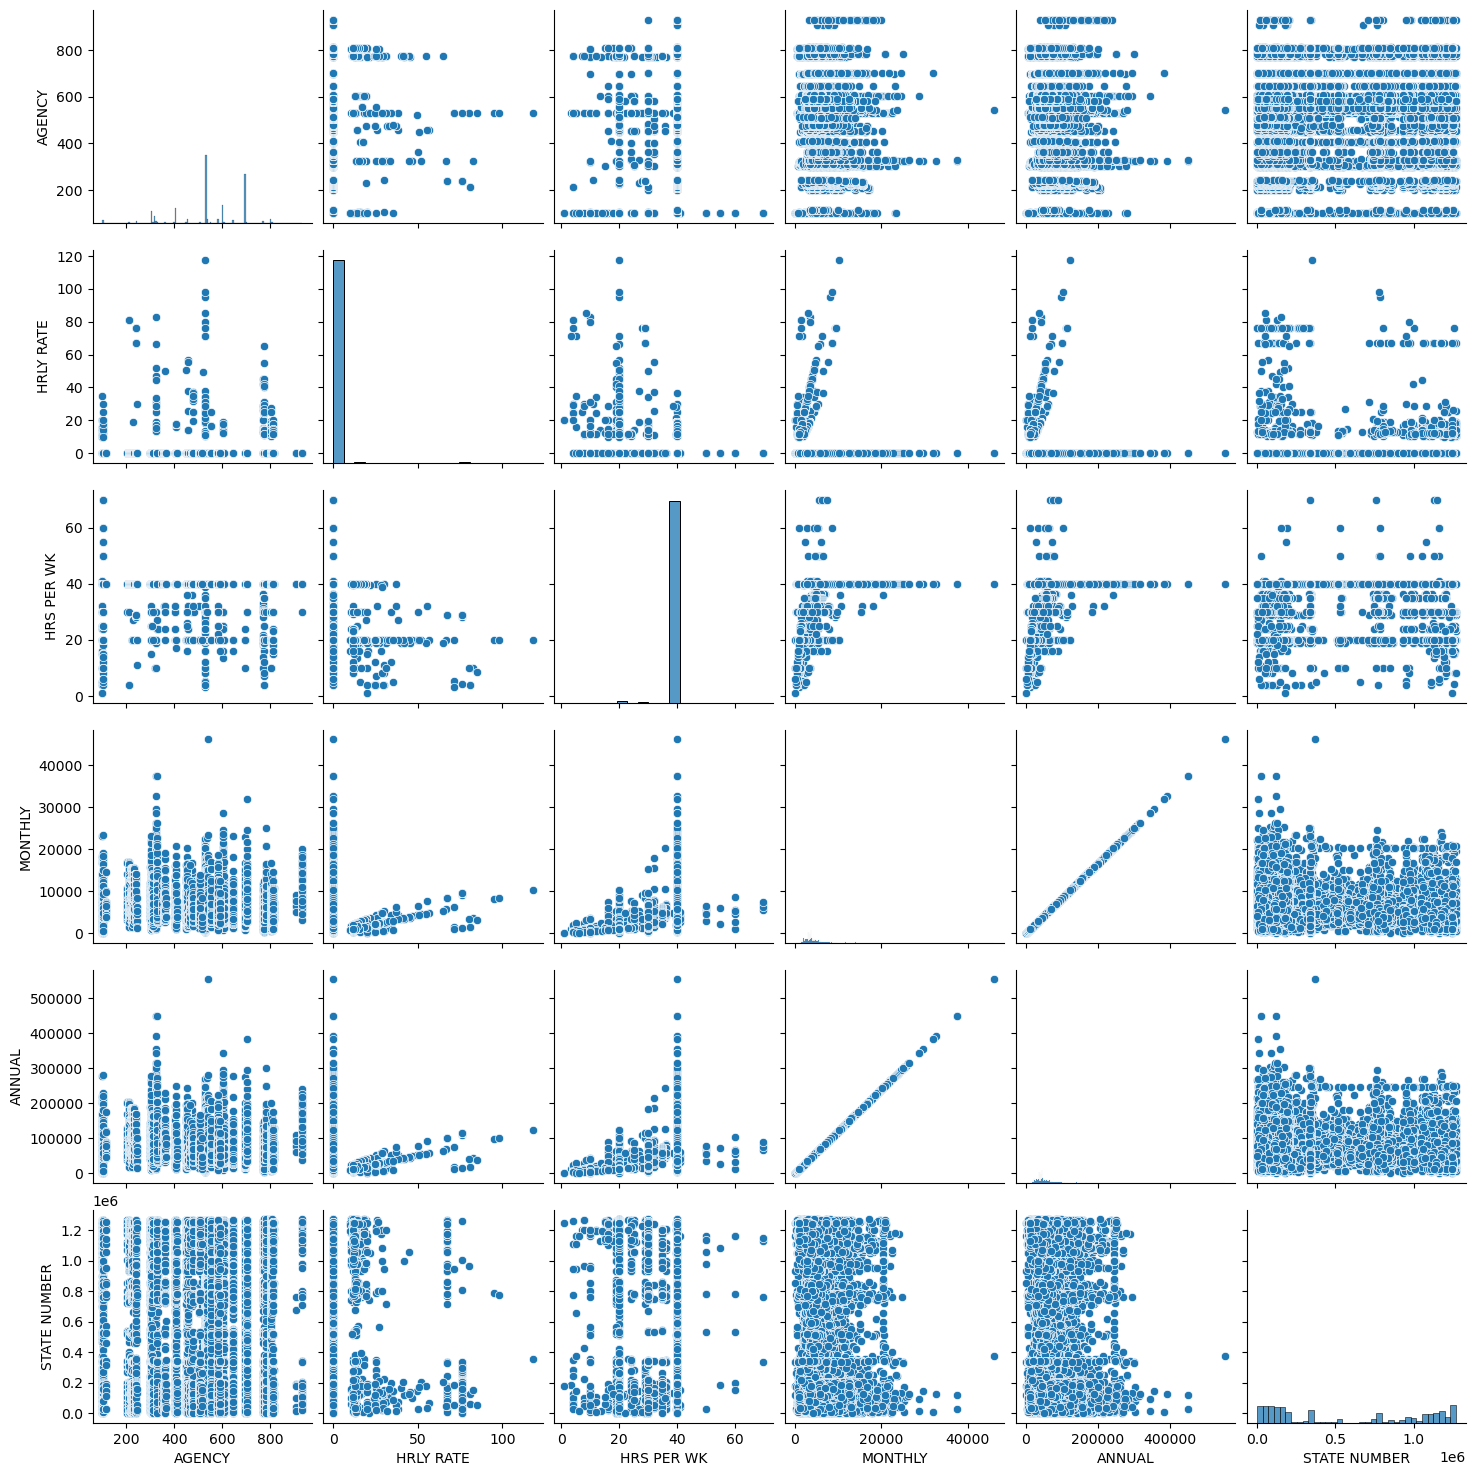

In [74]:
#Pair Plot
sns.pairplot(data=df)

## **Insights:**

More employees belongs to WHITE people.

More employees are FEMALE individuals.

HRS_PER_WEEK is having normal distribution.

HRLY_RATE and MONTHLY is having left skewed distribution.

The majority of an employee is less than 10000 dollars per month.

The majority of employees works in CLASSIFIED_REGULAR_FULL_TIME.

The majority of employee working in HEALTH AND HUMAN SERVICES COMMISSION that is about 36667 and TEXAS DEPARTMENT OF CRIMINAL JUSTICE is being in second place having 35926.

The majority no. of employees earn on a range of 0-8 dollars per hour.

The majority no.of employees work on an avearge of 40 hours per week.

## Top 5 agency names and their salaries

In [76]:
# Get the top 5 categories based on value counts
top_5_agencies = df['AGENCY NAME'].value_counts().head(5).index.tolist()

# Filter the DataFrame for the top 5 categories
df_top_5 = df[df['AGENCY NAME'].isin(top_5_agencies)]

In [77]:
df.groupby('AGENCY NAME')['ANNUAL'].mean().sort_values(ascending = False)

AGENCY NAME
COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     138298.202091
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL             120000.000000
TREASURY SAFEKEEPING TRUST COMPANY                    117943.637746
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS     117206.127273
FOURTEENTH COURT OF APPEALS DISTRICT                  112452.993000
                                                          ...      
SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED             42852.887368
HEALTH AND HUMAN SERVICES COMMISSION                   41851.890192
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                   41157.350070
HOUSE OF REPRESENTATIVES                               40884.925122
STATE PRESERVATION BOARD                               40858.390588
Name: ANNUAL, Length: 113, dtype: float64

In [78]:
mean_salary_by_agency = df.groupby('AGENCY NAME')['ANNUAL'].mean().sort_values(ascending=False)
top_5_agencies = mean_salary_by_agency.head(5).index.tolist()
df_top_5 = df[df['AGENCY NAME'].isin(top_5_agencies)]

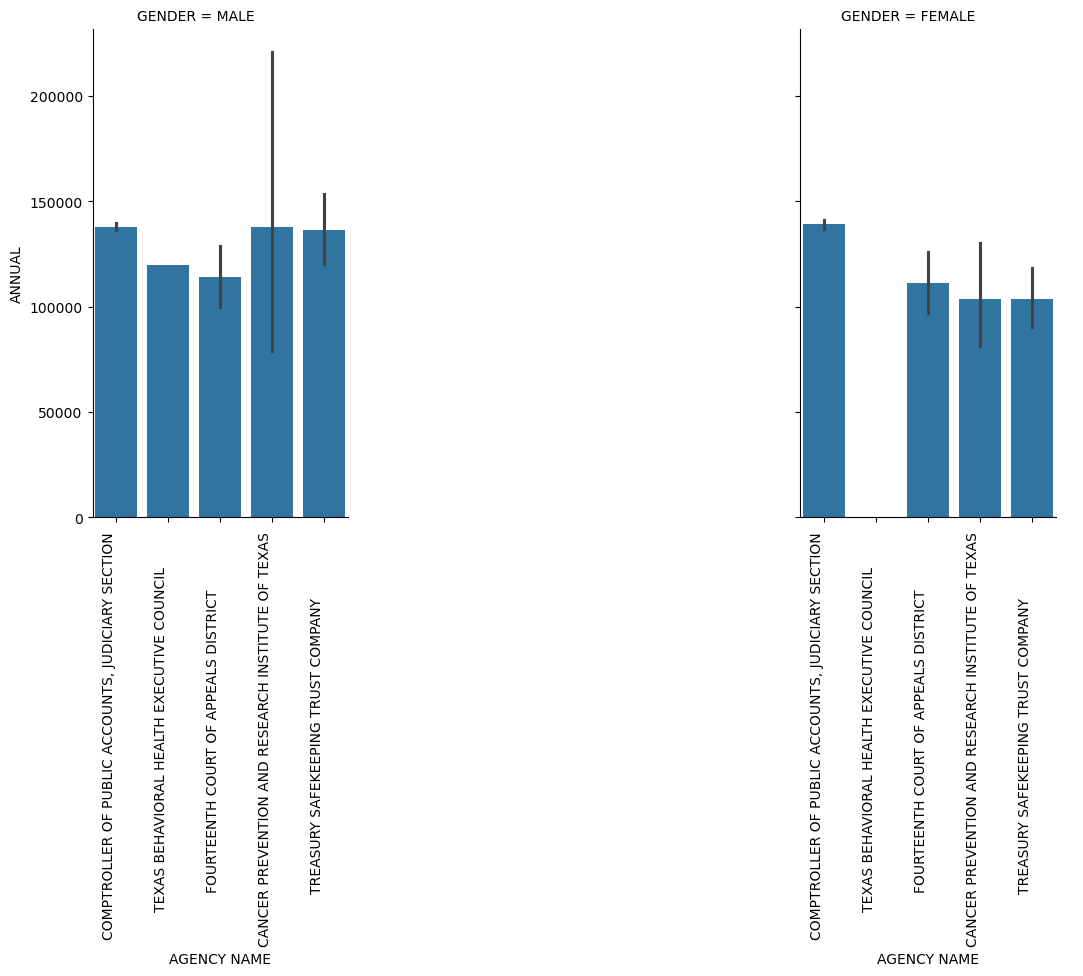

In [79]:
g = sns.catplot(x = 'AGENCY NAME', y = 'ANNUAL', data = df_top_5, col ='GENDER', kind = 'bar')
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.margins(x=0.01)  # Adjust margins if needed to prevent cutoff

# Set figure size
g.fig.set_size_inches(12, 6)

# Display the plot
plt.show()

## **TASK 3**
Who are the outliers in the salaries?

## Analyzing outliers

In [81]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

## Finding outliers in Salary

In [82]:
df['ANNUAL'].describe()

count    149481.000000
mean      50714.210973
std       25117.340292
min         600.000000
25%       36238.080000
50%       44642.040000
75%       58389.720000
max      553500.000000
Name: ANNUAL, dtype: float64

In [83]:
Outlier_in_salaries = df[(df['ANNUAL']>58389) | (df['ANNUAL']<36238)]['CLASS TITLE'].unique()
(Outlier_in_salaries.tolist())

['JUDGE, RETIRED                                    ',
 'GENERAL COUNSEL IV                                ',
 'DIRECTOR IV                                       ',
 'CONTRACT SPEC IV                                  ',
 'INSPECTOR II                                      ',
 'PROGRAM SPECIALIST V                              ',
 'PROGRAM SPECIALIST VI                             ',
 'VEHICLE DRIVER II                                 ',
 'RESIDENT SPECIALIST II                            ',
 'RESIDENT SPECIALIST III                           ',
 'LIBRARY ASST III                                  ',
 'ADMINISTRATIVE ASST III                           ',
 'ADMINISTRATIVE ASST II                            ',
 'VEHICLE DRIVER III                                ',
 'NURSE II                                          ',
 'HOURLY/SUBSTITUTES                                ',
 'RESIDENT SPECIALIST I                             ',
 'SUBSTITUTE WORKERS                                ',
 'LEGISLAT

## Removing Outliers in Salary

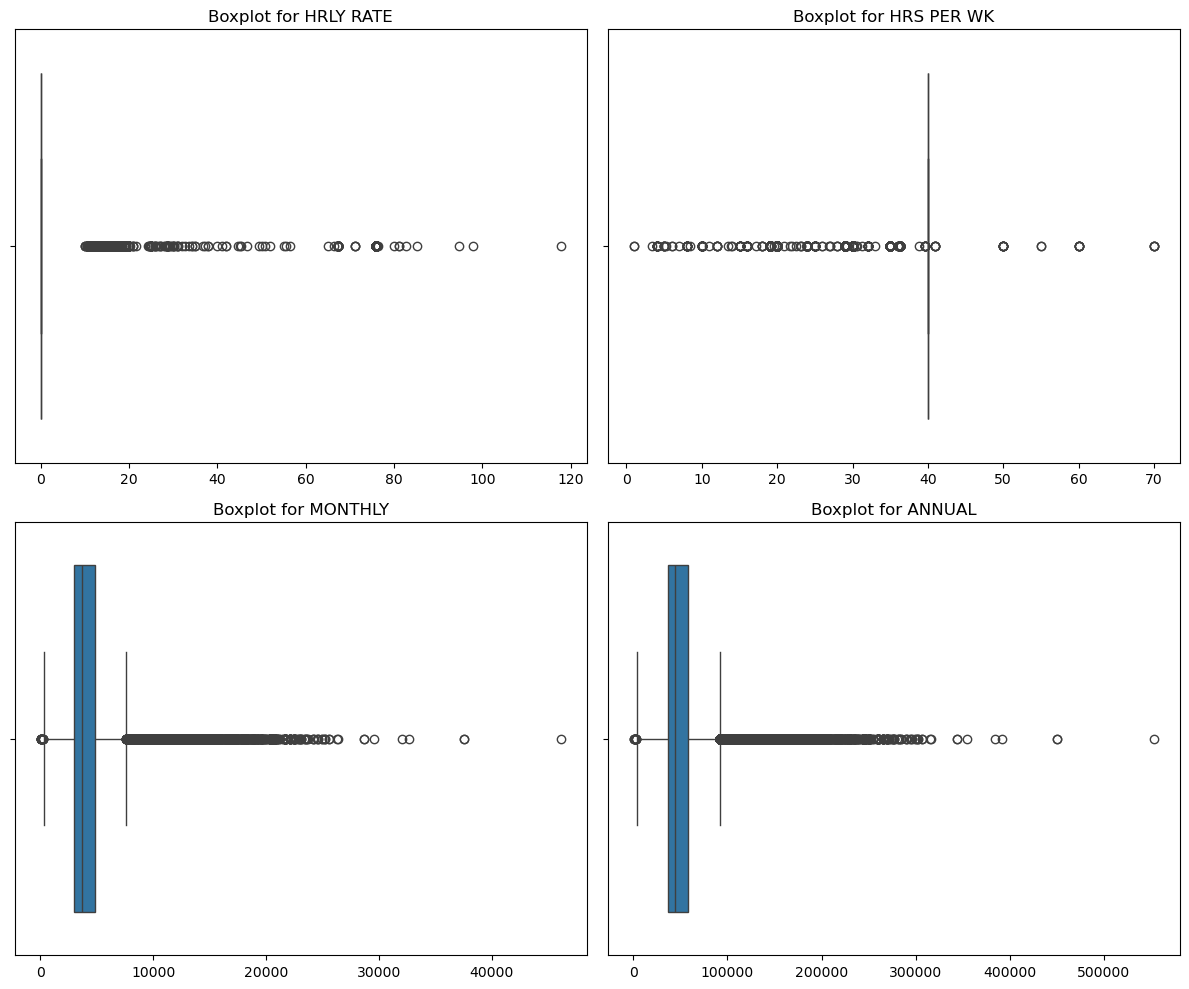

In [84]:
features = ['HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL']

# Creating subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Creating box plots for each feature in subplots
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel('')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [85]:
def find_boundaries(variable):

    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr #used to find the minimum value
    upper_range = q3 + 1.5 * iqr#max value
    return lower_range, upper_range

In [86]:
lower_ANNUAL, upper_ANNUAL = find_boundaries('ANNUAL')
print(lower_ANNUAL, upper_ANNUAL)

#capp the outlier / censoring the outlier
df.ANNUAL = np.where( df.ANNUAL > upper_ANNUAL, upper_ANNUAL, df.ANNUAL )
df.ANNUAL = np.where( df.ANNUAL < lower_ANNUAL, lower_ANNUAL, df.ANNUAL )

3010.6200000000026 91617.18


In [87]:
lower_MONTHLY, upper_MONTHLY = find_boundaries('MONTHLY')
print(lower_MONTHLY, upper_MONTHLY)

#capp the outlier / censoring the outlier
df.MONTHLY = np.where( df.MONTHLY > upper_MONTHLY, upper_MONTHLY, df.MONTHLY )
df.MONTHLY = np.where( df.MONTHLY < lower_MONTHLY, lower_MONTHLY, df.MONTHLY )

250.88499999999976 7634.765000000001


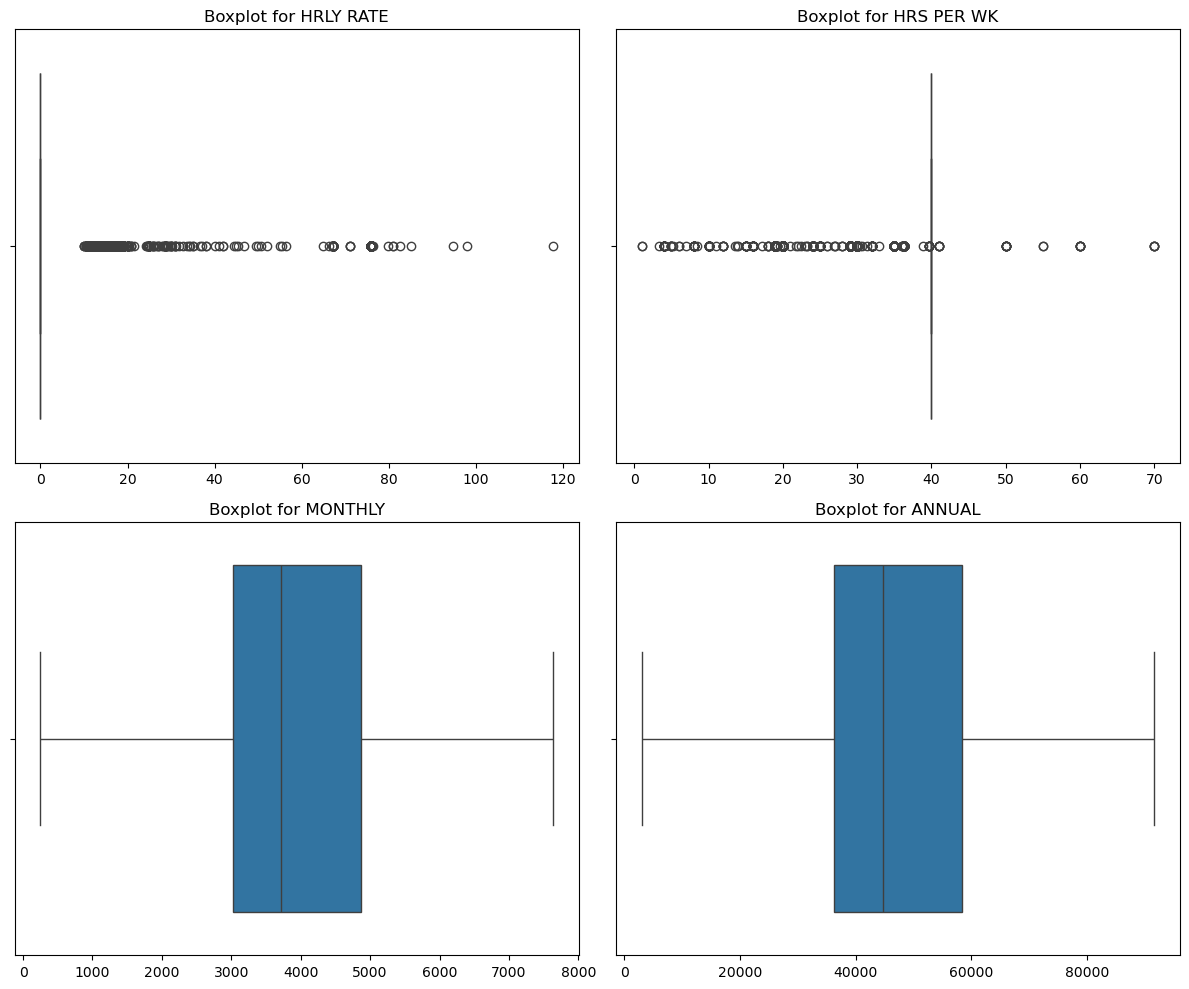

In [88]:
features = ['HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL']

# Creating subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Creating box plots for each feature in subplots
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel('')

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

Observing the range of the boxplots, we say that the outliers are removed from the original data. The new 'outliers' that we can see in the variables are moderate outliers that lied within the upper whisker-lower whisker range before removing the original outliers. It can be seen that the variable Monthly& Annual has no new outliers.

It is up to the discretion of the data scientist, to remove them or not; and maybe decided after evaluating the model performance.

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimension is reduced it implies that the outliers are removed.

<Axes: xlabel='ANNUAL', ylabel='Count'>

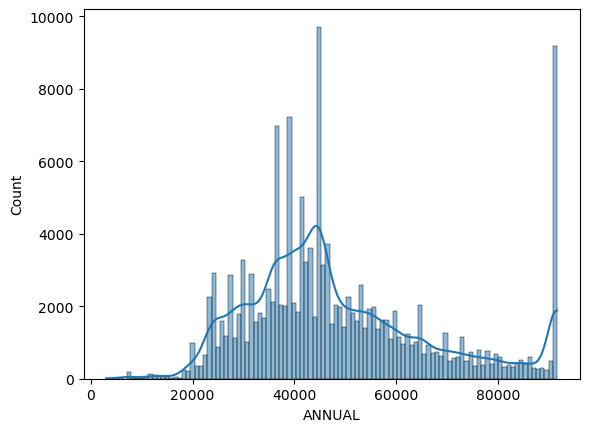

In [89]:
sns.histplot(x = 'ANNUAL', data = df, kde = True)

In [90]:
df.shape

(149481, 16)

In [91]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

## Correlation between Continous Features

In [92]:
con_features = df[['HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL']].corr()
con_features

,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
HRLY RATE,1.000000,-0.337784,0.071839,0.071839
HRS PER WK,-0.337784,1.000000,0.132252,0.132252
MONTHLY,0.071839,0.132252,1.000000,1.000000
ANNUAL,0.071839,0.132252,1.000000,1.000000


<Axes: >

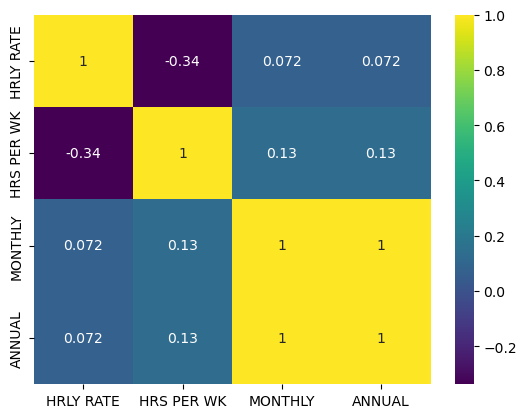

In [97]:
sns.heatmap(con_features, annot = True, cmap="viridis")

#### As expected mothly and Annual features are highly correlated, so we can drop any one of the feature, we'll drop monthly feature.

In [98]:
df.drop('MONTHLY', axis = 1, inplace = True)

In [99]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,91617.18,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,91617.18,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,39411.24,165030


## **TASK 3**
### What departments/roles have the biggest wage disparities between managers and employees?

### Wage Disparities

<function matplotlib.pyplot.show(close=None, block=None)>

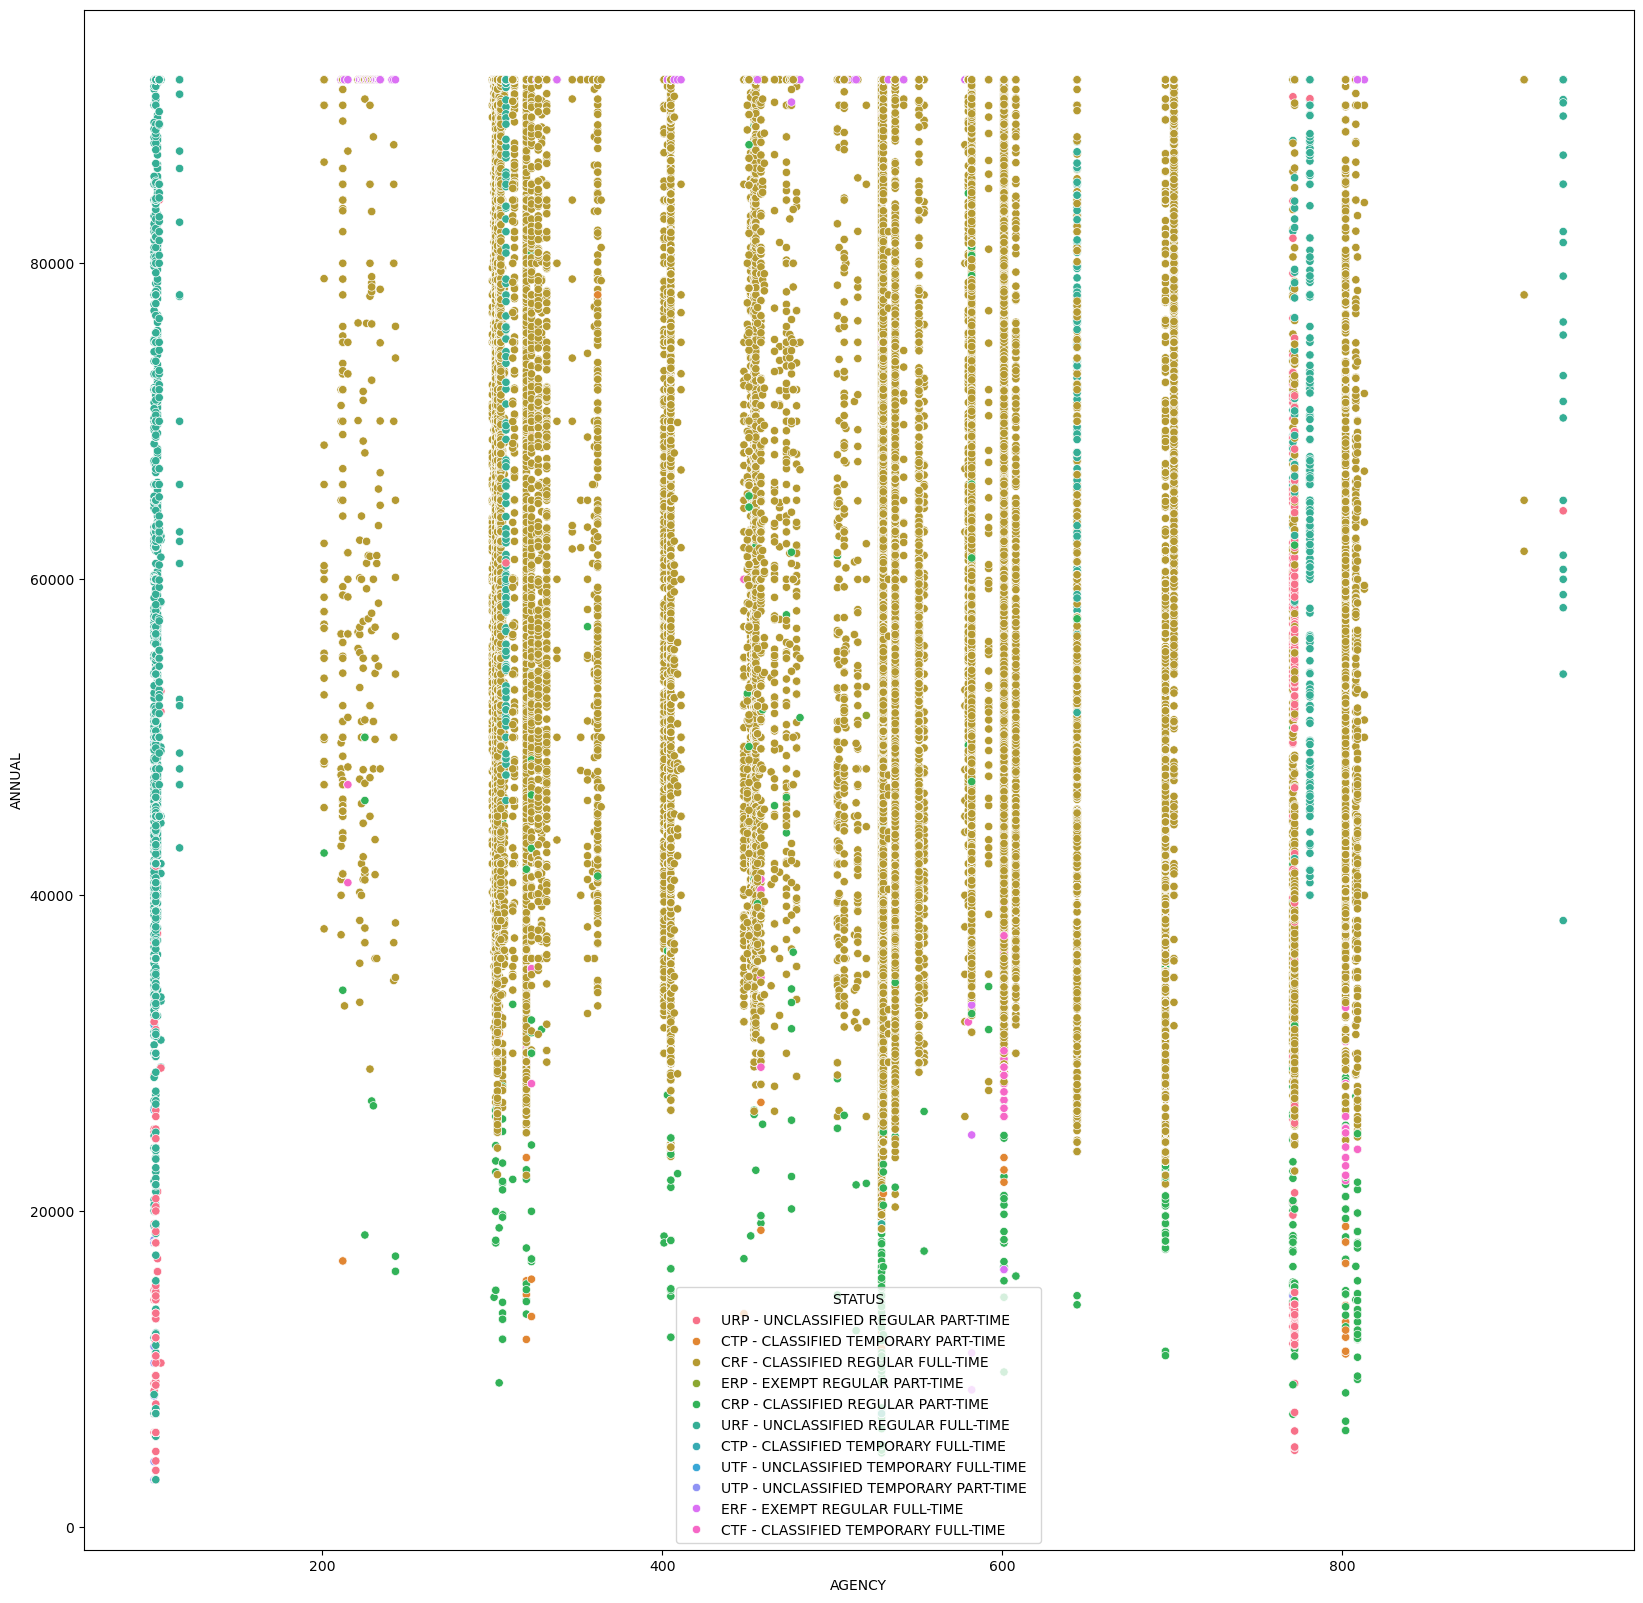

In [101]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='AGENCY', y='ANNUAL', data=df, hue='STATUS')
plt.show

In [102]:
pd.pivot_table(df, index = ['AGENCY NAME','STATUS','CLASS TITLE'], values = 'ANNUAL')

ANNUAL
AGENCY NAME                                        STATUS                                   CLASS TITLE                                                 
ALCOHOLIC BEVERAGE COMMISSION                      CRF - CLASSIFIED REGULAR FULL-TIME       ACCOUNTANT I                                        39263.52
                                                                                            ACCOUNTANT II                                       42500.04
                                                                                            ACCOUNTANT IV                                       51000.00
                                                                                            ACCOUNTANT VI                                       63543.48
                                                                                            ACCTS EXAM I                                        36000.00
...                                                                                                                                                  ...
WATER DEVELOPMENT BOARD                            CRP - CLASSIFIED REGULAR PART-TIME       DATA BASE ADMINISTRATOR IV                          84430.32
                                                                                            ENGINEER IV                                         62893.68
                                                   CTF - CLASSIFIED TEMPORARY FULL-TIME     ADMINISTRATIVE ASST I                               31980.00
                                                   ERF - EXEMPT REGULAR FULL-TIME           BOARD MEMBER                                        91617.18
                                                                                            EXECUTIVE ADMINISTRATOR, WATER                      91617.18

[7700 rows x 1 columns]

In [103]:
pd.pivot_table(df, index = ['AGENCY NAME'], values = ['CLASS TITLE'], aggfunc = 'count')

,CLASS TITLE
AGENCY NAME,
ALCOHOLIC BEVERAGE COMMISSION,642
BOARD OF ARCHITECTURAL EXAMINERS,19
BOARD OF CHIROPRACTIC EXAMINERS,10
BOARD OF DENTAL EXAMINERS,56
BOARD OF EXAMINERS OF PSYCHOLOGISTS,15
...,...
THIRD COURT OF APPEALS DISTRICT,32
THIRTEENTH COURT OF APPEALS DISTRICT,30
TREASURY SAFEKEEPING TRUST COMPANY,71


In [104]:
pd.pivot_table(df, index = ['AGENCY NAME','CLASS TITLE','STATUS'], values = 'ANNUAL')

ANNUAL
AGENCY NAME                                        CLASS TITLE                                        STATUS                                            
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       CRF - CLASSIFIED REGULAR FULL-TIME        39263.52
                                                   ACCOUNTANT II                                      CRF - CLASSIFIED REGULAR FULL-TIME        42500.04
                                                   ACCOUNTANT IV                                      CRF - CLASSIFIED REGULAR FULL-TIME        51000.00
                                                   ACCOUNTANT VI                                      CRF - CLASSIFIED REGULAR FULL-TIME        63543.48
                                                   ACCTS EXAM I                                       CRF - CLASSIFIED REGULAR FULL-TIME        36000.00
...                                                                                                                                                  ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 CRF - CLASSIFIED REGULAR FULL-TIME        91617.18
                                                   SYSTEMS SUPPORT SPECIALIST II                      CRF - CLASSIFIED REGULAR FULL-TIME        48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     CRF - CLASSIFIED REGULAR FULL-TIME        52722.36
                                                   WEB ADMINISTRATOR III                              CRF - CLASSIFIED REGULAR FULL-TIME        72381.12
                                                   WEB ADMINISTRATOR V                                CRF - CLASSIFIED REGULAR FULL-TIME        87178.08

[7700 rows x 1 columns]

In [105]:
pivot_table=pd.pivot_table(df, index = ['STATUS','CLASS TITLE'], values = 'ANNUAL')

In [106]:
wage_disparities_department = pivot_table.max(axis=1) - pivot_table.min(axis=1)
wage_disparities_job_title = pivot_table.max(axis=0) - pivot_table.min(axis=0)

In [107]:
# Print the pivot table
print("Pivot Table - Average Salary by Department and Job Title:")
print(pivot_table)

# Calculate wage disparities
wage_disparities_department = pivot_table.max(axis=1) - pivot_table.min(axis=1)
wage_disparities_job_title = pivot_table.max(axis=0) - pivot_table.min(axis=0)

print("\nWage Disparities by Department:")
print(wage_disparities_department)

print("\nWage Disparities by Job Title:")
print(wage_disparities_job_title)

Pivot Table - Average Salary by Department and Job Title:
                                                                                                   ANNUAL
STATUS                                   CLASS TITLE                                                     
CRF - CLASSIFIED REGULAR FULL-TIME       AC & BOILER OPER I                                  29463.032000
                                         AC & BOILER OPER II                                 37501.170000
                                         AC & BOILER OPER III                                48749.808000
                                         AC & BOILER OPER IV                                 49878.480000
                                         ACCOUNTANT I                                        38364.777931
...                                                                                                   ...
UTP - UNCLASSIFIED TEMPORARY PART-TIME   LEG. SERVICE/MAINTENANCE                             

In [108]:
max_disparity_department = wage_disparities_department.idxmax()
max_disparity_value_department = wage_disparities_department.max()

max_disparity_job_title = wage_disparities_job_title.idxmax()
max_disparity_value_job_title = wage_disparities_job_title.max()

In [116]:
print(f"The department with the highest wage disparity is '{max_disparity_department}'"
       f"with a disparity of {max_disparity_value_department}")
print(f"The job title with the highest wage disparity is '{max_disparity_job_title}' "
      f"with a disparity of {max_disparity_value_job_title}")

The department with the highest wage disparity is '('CRF - CLASSIFIED REGULAR FULL-TIME      ', 'AC & BOILER OPER I                                ')'with a disparity of 0.0
The job title with the highest wage disparity is 'ANNUAL' with a disparity of 88223.46


### **TASK 3**
#### Have salaries and total compensations for some roles/ departments/
#### head-count changed over time?

## Change in compensation over time

In [118]:
df["year_of_employment"] = pd.DatetimeIndex(df['EMPLOY DATE']).year

In [119]:
df['years_of_service'] = 2024- df['year_of_employment']

In [120]:
df['years_of_service'] = df['years_of_service'].clip(lower=0)

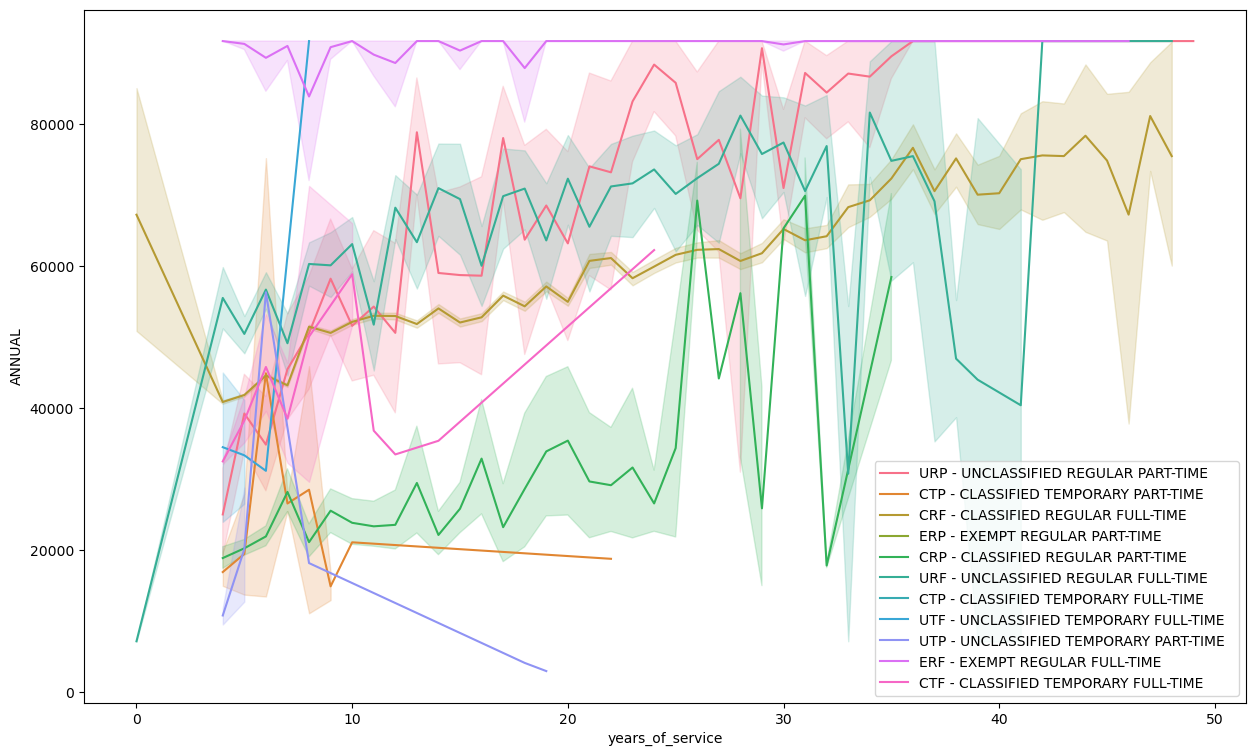

In [121]:
plt.figure(figsize=(15,9))
sns.lineplot(x='years_of_service', y='ANNUAL',hue ='STATUS', data= df)
plt.legend()
plt.show()

In [122]:
df.pivot_table(values = ['ANNUAL', 'years_of_service'], index = ['CLASS TITLE','STATUS'], aggfunc = 'mean')

,,ANNUAL,years_of_service
CLASS TITLE,STATUS,,
14 CUSTOMER SERVICES REP,URF - UNCLASSIFIED REGULAR FULL-TIME,40403.177143,5.857143
19 EXECUTIVE ASSISTANT,URF - UNCLASSIFIED REGULAR FULL-TIME,64992.960000,7.500000
20 PROGRAM SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,59445.274286,13.571429
21 BUSINESS ANALYST,URF - UNCLASSIFIED REGULAR FULL-TIME,64422.800000,20.333333
21 SYSTEMS ADMINISTRATOR III,URF - UNCLASSIFIED REGULAR FULL-TIME,58375.020000,6.500000
...,...,...,...
WRITING SPEC I,URF - UNCLASSIFIED REGULAR FULL-TIME,39249.960000,6.500000
WRITING SPEC II,URF - UNCLASSIFIED REGULAR FULL-TIME,42999.960000,10.000000
WRITING SPECIALIST III,URF - UNCLASSIFIED REGULAR FULL-TIME,49451.920000,17.333333


In [123]:
import pandas as pd

# Assuming df is your DataFrame and includes 'ANNUAL', 'years_of_service', 'CLASS TITLE', and 'STATUS' columns

# Create a pivot table to calculate mean annual wages and years of service for each role and status
pivot_table = df.pivot_table(values=['ANNUAL', 'years_of_service'], index=['CLASS TITLE', 'STATUS'], aggfunc='mean')

# Reset index to make 'CLASS TITLE' and 'STATUS' columns instead of index
pivot_table = pivot_table.reset_index()

# Calculate mean salary and compensation over time
# Here, we assume 'years_of_service' represents time; alternatively, you can use other time-related columns if available
mean_salaries_over_time = df.groupby('years_of_service')['ANNUAL'].mean().reset_index()

# Display the results
print(mean_salaries_over_time)

    years_of_service        ANNUAL
0                  0  50053.465714
1                  4  40036.313718
2                  5  42003.269960
3                  6  44460.230846
4                  7  43331.861096
5                  8  51399.400899
6                  9  51008.676091
7                 10  52163.484908
8                 11  53243.106643
9                 12  53071.234279
10                13  52651.864203
11                14  54235.212899
12                15  52787.178736
13                16  52932.487064
14                17  56464.667128
15                18  54677.482391
16                19  57484.583347
17                20  55192.510417
18                21  61242.688324
19                22  61327.865279
20                23  59270.271289
21                24  60423.775654
22                25  62473.852931
23                26  62668.528463
24                27  63059.509375
25                28  61142.714902
26                29  63478.131318
27                30

The pivot table provides a detailed view of how salaries and tenure vary across different roles (CLASS TITLE) and statuses (STATUS). It helps in identifying disparities or trends within specific job categories.

**Career Progression Analysis**:
The mean_salaries_over_time analysis allows you to understand how salaries evolve over time as employees accumulate more years of service. This can reveal patterns such as salary growth trajectories and potential anomalies.

### Converting categorical column to Numerical columns

In [126]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = label.fit_transform(df[df.columns[i]])

df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,ANNUAL,STATE NUMBER,year_of_employment,years_of_service
0,241,17,30461,15274,22,1409,711,5,1,8,947,75.96150,29.0,91617.18,127717,1988,36
1,212,48,30461,15274,22,616,560,5,1,4,605,81.04454,4.0,16857.24,127717,2015,9
2,241,17,33197,10053,10,1409,711,5,1,8,610,75.96150,29.0,91617.18,59115,2020,4
3,212,48,33197,10053,10,616,560,5,1,4,4268,81.04453,4.0,16857.24,59115,2018,6
4,696,88,26462,6953,0,810,292,3,0,0,3209,0.00000,40.0,39411.24,165030,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,76,37355,10053,16,1042,1198,5,1,0,5308,0.00000,40.0,34788.00,770781,2017,7
149477,809,76,37780,7024,1,84,1404,5,0,0,3444,0.00000,40.0,66000.00,847431,2015,9
149478,809,76,38068,5571,3,4,324,5,1,1,5062,12.93000,20.0,13447.20,34266,2012,12
149479,809,76,38313,6089,18,278,1007,5,1,0,4677,0.00000,40.0,68929.92,123490,1989,35


In [127]:
X_new =df.drop(['EMPLOY DATE','ANNUAL', 'STATE NUMBER'], axis=1)
y=df[['ANNUAL']]

In [128]:
X_new.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,year_of_employment,years_of_service
0,241,17,30461,15274,22,1409,711,5,1,8,75.96150,29.0,1988,36
1,212,48,30461,15274,22,616,560,5,1,4,81.04454,4.0,2015,9
2,241,17,33197,10053,10,1409,711,5,1,8,75.96150,29.0,2020,4
3,212,48,33197,10053,10,616,560,5,1,4,81.04453,4.0,2018,6
4,696,88,26462,6953,0,810,292,3,0,0,0.00000,40.0,2020,4


In [129]:
y.head()

,ANNUAL
0,91617.18
1,16857.24
2,91617.18
3,16857.24
4,39411.24


#  Model selection and model preparation

In [131]:
X_new.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,year_of_employment,years_of_service
0,241,17,30461,15274,22,1409,711,5,1,8,75.96150,29.0,1988,36
1,212,48,30461,15274,22,616,560,5,1,4,81.04454,4.0,2015,9
2,241,17,33197,10053,10,1409,711,5,1,8,75.96150,29.0,2020,4
3,212,48,33197,10053,10,616,560,5,1,4,81.04453,4.0,2018,6
4,696,88,26462,6953,0,810,292,3,0,0,0.00000,40.0,2020,4


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=42)

In [133]:
X_train.shape, X_test.shape

((119584, 14), (29897, 14))

## Scaling the data

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model Building

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [136]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model
    automating the fit and accuracy process"""

    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_test_scaled)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print("Train R2 :", model.score(X_train_scaled, y_train))
    print("Test R2: ", model.score(X_test_scaled, y_test))
    print("Cross Validation Score: ", scores.mean())
    return 'Model ran Succesfully!'

In [137]:
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge()
model4 = XGBRegressor()
models = [model1,model2, model3, model4]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print(fitAndPredict(model))

Model  1 : LinearRegression()
Train R2 : 0.2626075107899771
Test R2:  0.2646628291471893
Cross Validation Score:  0.2622362055358264
Model ran Succesfully!
Model  2 : Lasso()
Train R2 : 0.2625789179996576
Test R2:  0.2650768900745888
Cross Validation Score:  0.2621990256416617
Model ran Succesfully!
Model  3 : Ridge()
Train R2 : 0.2626074901479888
Test R2:  0.264676378711698
Cross Validation Score:  0.2622361734768403
Model ran Succesfully!
Model  4 : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,


In [138]:
model4.score(X_train_scaled, y_train)

0.9278273648827506

In [141]:
y_preds = model4.predict(X_test_scaled)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error

In [143]:
rmse = np.sqrt(mean_squared_error(y_test, y_preds)) #RSME
print(rmse)
print(mean_squared_error(y_test, y_preds))
print(r2_score(y_test, y_preds))

5414.53038616765
29317139.302732807
0.9147313633783871


In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
random_forest_model = RandomForestRegressor(n_estimators=100, verbose=0, random_state=0)
random_forest_model.fit(X_train_scaled,y_train)
forest_pred = random_forest_model.predict(X_test_scaled)
print(mean_absolute_error(forest_pred, y_test))
print(mean_squared_error(forest_pred, y_test))

2380.918138816621
20094052.839066155


In [146]:
print(r2_score(y_test, forest_pred))

0.9415566276062239


## CONCLUSION

## TASK 1
### EDA is performed and here is the key insights and overall data analysis report

1.Introduction

This report analyzes a salary dataset encompassing positions across all 113 agencies in the Texas state government. The dataset includes 149,481 data points with 21 features, focusing on understanding salary distributions, workforce demographics, and employment characteristics.

2.Dataset Overview

Features: The dataset comprises 21 features, including both numerical (8) and categorical (13) variables.

Target Variable: Annual salary is chosen as the target variable, with monthly salary considered as a feature.

Data Quality: Some columns such as "duplicated", "multiple_full_time_jobs", "combined_multiple_jobs", "summed_annual_salary", and "hide_from_search" contain null values and lack variance, with "multiple_full_time_jobs" having a standard deviation of 0, indicating no variability.

3.Salary and Work Characteristics

Salary Range: Employees' annual salaries range from $600 to $553,500, showcasing a diverse salary spectrum.

Working Hours: Weekly working hours range from 1 hour to a maximum of 70 hours per employee.

Distribution: Monthly salaries exhibit a left-skewed distribution, while hourly rates follow a similar pattern, with a majority earning between $0 to $8 per hour.

4.Workforce Demographics

Ethnicity and Gender: The dataset predominantly represents White individuals and has a higher proportion of female employees.

Employment Type: Most employees work in classified regular full-time positions, indicating stability in employment status.

Agency Distribution: The Health and Human Services Commission employs the highest number of individuals (approximately 36,667), followed by the Texas Department of Criminal Justice (approximately 35,926).

5.Insights and Recommendations
   
Insights: The analysis shows that more research is necessary to determine the reasons causing compensation differences between agencies and demographic groups. Enhancing diversity and equity in hiring practices should be the main goals of strategies.

It is recommended to carry out data preprocessing procedures in order to manage null values and eliminate unnecessary columns that lack variation. To find out how factors like gender and ethnicity affect income disparities, do in-depth investigations.

6.Conclusion
   
To sum up, the dataset offers insightful information about wage distributions, workforce composition, and employment traits in the Texas state government. These insights can be used in future research and strategic planning to improve workforce management procedures and guarantee equitable working conditions throughout agencies.

## TASK 2
### model creation
We built 5 predictive models
1. LinearRegression
2. Ridge
3. Lasso
4. XGBRegressor
5. RandomForestRegressor

After evaluating the multiple models we getting highest r2 score of **94.15%**
and least mean squared error for the RandomForestRegressor model so we are concluding that **RandomForestRegressor** is the best model which will help theTexas state government team to know the payroll information of employees of the state of Texas.

## TASK 3

a) outliers in the salaries

To determine the outliers in the salary, we can consider the hourly rates and the mean average salary, plotted against the agency and status of the workforce.

If we observe the plotted graph of average hourly rate against the agency name, we can see that the “COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY”, has a distinct peak, almost six times more than the other agencies in the mix.
Next, if we check the graph of average hourly rate plotted against the status, we observe that EXEMPT REGULAR PART-TIME, ERP and UNCLASSIFIED REGULAR PART-TIME, URP categories are exceeding other categories around 5 and 3 times respectively. This can be further observed in the box plot between Annual and status.

b) departments/roles have the biggest wage disparities between
managers and employees.

The department with the highest wage disparity is ('CRF - CLASSIFIED REGULAR FULL-TIME', 'AC & BOILER OPER I') with the highest wage disparity in 'ANNUAL'  with a disparity of 88223.46

c) salaries and total compensations for some roles/ departments/
head-count changed over time

The pivot table provides a detailed view of how salaries and tenure vary across different roles (CLASS TITLE) and statuses (STATUS). It helps in identifying disparities or trends within specific job categories.

Career Progression Analysis: The mean_salaries_over_time analysis allows you to understand how salaries evolve over time as employees accumulate more years of service. This can reveal patterns such as salary growth trajectories and potential anomalies.

### Some of the challenges we faced as a team are:

1)Poor Data Quality: The lack of high-quality data is one of the major problems our team is facing. A messy or noisy set of data might make the entire procedure quite taxing. "Duplicated", "comb_mlti_jobs", "summed_annual_salary", and "hide_from_search" all have null values. There is little variation in many aspects; for example, the standard deviation for the "multiple full-time jobs" column is 0, which indicates that there is no volatility in the data. In order to get around this problem, we remove a few features because we are ignoring the columns with more than 96% of missing values.

2)Slow process: Although machine learning models are quite effective at producing correct results, the process is very time-consuming.

3)Underfitting of Training Data:  This process occurs when data is unable to establish an accurate relationship between input and output variables.It signifies the data is too simple to establish a precise relationship. To overcome this issue: Maximize the training time,add relevent features to the data, increasing the training time of model.

4)Overfitting of Training Data : Overfitting refers to ML model trained with a massive amount of data that negatively affect its performance. We can tackle this issue by:Analyzing the data with perfection, remove outliers in the training set, remove unwanted feature. For particular agency_name their will be unique agency_code, so we are droping agency_name and also We dropped last name, first name, MI and emp_date because these are not relevent features for our model creation.